## Proyek Analisis Data : Air Quality Dataset
    Nama  : Ikhwan Aminullah
    email : ikhwan.aminullah46@gmail.com

# Beijing Stations Air Quality Analysis

This datasets contains air quality data from various stations in Beijing. The data includes the value of some pollutants concentration, some weather value, and the date of collected data.

## Objectives :
1. How is the air quality of beijing from 2013 to 2017?
2. Which station is the most polluted?
3. Where does the Pollution came from?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the datasets.
df_aotizhongxin = pd.read_csv('PRSA_Data_Aotizhongxin_20130301-20170228.csv')
df_Changping = pd.read_csv('PRSA_Data_Changping_20130301-20170228.csv')
df_Dingling = pd.read_csv('PRSA_Data_Dingling_20130301-20170228.csv')
df_Dongsi = pd.read_csv("PRSA_Data_Dongsi_20130301-20170228.csv")
df_Guanyuan = pd.read_csv("PRSA_Data_Guanyuan_20130301-20170228.csv")
df_Gucheng = pd.read_csv("PRSA_Data_Gucheng_20130301-20170228.csv")
df_Huairou = pd.read_csv('PRSA_Data_Huairou_20130301-20170228.csv')
df_Nongzhanguan = pd.read_csv("PRSA_Data_Nongzhanguan_20130301-20170228.csv")
df_Shunyi = pd.read_csv("PRSA_Data_Shunyi_20130301-20170228.csv")
df_Tiantan = pd.read_csv("PRSA_Data_Tiantan_20130301-20170228.csv")
df_Wanliu = pd.read_csv("PRSA_Data_Wanliu_20130301-20170228.csv")
df_Wanshouxigong = pd.read_csv("PRSA_Data_Wanshouxigong_20130301-20170228.csv")

In [3]:
df_aotizhongxin.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34139.000000,34346.000000,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.135694,95.223005,22.823017,37.116200,1221.436236,57.916327,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,155.000000,21.000000,82.000000,1500.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


In [4]:
# changing the date into one column and make it into datetime datatype
df_aotizhongxin['date'] = pd.to_datetime(df_aotizhongxin[['year', 'month', 'day','hour']])
df_aotizhongxin.drop(['year', 'month', 'day', 'hour'], axis=1, inplace = True)
df_aotizhongxin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   No       35064 non-null  int64         
 1   PM2.5    34139 non-null  float64       
 2   PM10     34346 non-null  float64       
 3   SO2      34129 non-null  float64       
 4   NO2      34041 non-null  float64       
 5   CO       33288 non-null  float64       
 6   O3       33345 non-null  float64       
 7   TEMP     35044 non-null  float64       
 8   PRES     35044 non-null  float64       
 9   DEWP     35044 non-null  float64       
 10  RAIN     35044 non-null  float64       
 11  wd       34983 non-null  object        
 12  WSPM     35050 non-null  float64       
 13  station  35064 non-null  object        
 14  date     35064 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(11), int64(1), object(2)
memory usage: 4.0+ MB


In [5]:
# showing number of missing values for the aothizhongxin datasets.
df_aotizhongxin.isna().sum()

No            0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
date          0
dtype: int64

### Filling the missing values
Since the dataset still contains a lot of missing values, we should fill them. The dataset is a time series dataset, which means that most likely the data from time to time correlates to each other. We should fill the missing value with interpolation.

In [6]:
columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3',
           'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

# Do interpolation for each numberical column containing missing value
for column in columns:
    df_aotizhongxin[column] = df_aotizhongxin[column].interpolate(method = 'linear', limit_direction = 'both')
df_aotizhongxin.isna().sum()

No          0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd         81
WSPM        0
station     0
date        0
dtype: int64

The wind direction column still contains missing values. We should fill it with the closest value in time.

In [7]:
df_aotizhongxin['wd'].value_counts()

NE     5140
ENE    3950
SW     3359
E      2608
NNE    2445
WSW    2212
SSW    2098
N      2066
NW     1860
ESE    1717
NNW    1589
SE     1341
S      1304
W      1171
WNW    1101
SSE    1022
Name: wd, dtype: int64

In [8]:
df_aotizhongxin['wd'].ffill(inplace = True)
df_aotizhongxin.isna().sum()

No         0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
date       0
dtype: int64

In [9]:
# checking for duplicates
df_aotizhongxin.duplicated().sum()

0

In [10]:
df_Changping.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34290.000000,34482.000000,34436.000000,34397.000000,33543.000000,34460.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,71.099743,94.657871,14.958906,44.182086,1152.301345,57.940003,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.326926,83.441738,20.975331,29.519796,1103.056282,54.316674,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,15.636600,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,100.000000,131.000000,18.000000,60.358200,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,882.000000,999.000000,310.000000,226.000000,10000.000000,429.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


In [11]:
# combining the date into one and change it to date time
df_Changping['date'] = pd.to_datetime(df_Changping[['year', 'month', 'day', 'hour']])
df_Changping.drop(['year', 'month', 'day', 'hour'], axis=1, inplace = True)
df_Changping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   No       35064 non-null  int64         
 1   PM2.5    34290 non-null  float64       
 2   PM10     34482 non-null  float64       
 3   SO2      34436 non-null  float64       
 4   NO2      34397 non-null  float64       
 5   CO       33543 non-null  float64       
 6   O3       34460 non-null  float64       
 7   TEMP     35011 non-null  float64       
 8   PRES     35014 non-null  float64       
 9   DEWP     35011 non-null  float64       
 10  RAIN     35013 non-null  float64       
 11  wd       34924 non-null  object        
 12  WSPM     35021 non-null  float64       
 13  station  35064 non-null  object        
 14  date     35064 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(11), int64(1), object(2)
memory usage: 4.0+ MB


In [12]:
# check for missing value
df_Changping.isna().sum()

No            0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
date          0
dtype: int64

In [13]:
# do interpolation for filling in the missing values
for column in columns:
    df_Changping[column] = df_Changping[column].interpolate(method = 'linear', limit_direction = 'both')
df_Changping.isna().sum()

No           0
PM2.5        0
PM10         0
SO2          0
NO2          0
CO           0
O3           0
TEMP         0
PRES         0
DEWP         0
RAIN         0
wd         140
WSPM         0
station      0
date         0
dtype: int64

In [14]:
# Filling in the missing wind direction values.
df_Changping['wd'].ffill(inplace = True)
df_Changping.isna().sum()

No         0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
date       0
dtype: int64

In [15]:
# checking for duplicates
df_Changping.duplicated().sum()

0

In [16]:
# combining the dates and change it to datetime
df_Dingling['date'] = pd.to_datetime(df_Dingling[['year', 'month', 'day', 'hour']])
df_Dingling.drop(['year', 'month', 'day', 'hour'], axis=1, inplace = True)
df_Dingling

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date
0,1,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling,2013-03-01 00:00:00
1,2,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling,2013-03-01 01:00:00
2,3,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling,2013-03-01 02:00:00
3,4,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling,2013-03-01 03:00:00
4,5,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling,2013-03-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,11.0,11.0,2.0,2.0,200.0,99.0,11.7,1008.9,-13.3,0.0,NNE,1.3,Dingling,2017-02-28 19:00:00
35060,35061,13.0,13.0,2.0,2.0,200.0,101.0,10.9,1009.0,-14.0,0.0,N,2.1,Dingling,2017-02-28 20:00:00
35061,35062,9.0,14.0,2.0,2.0,200.0,102.0,9.5,1009.4,-13.0,0.0,N,1.5,Dingling,2017-02-28 21:00:00
35062,35063,10.0,12.0,2.0,2.0,200.0,97.0,7.8,1009.6,-12.6,0.0,NW,1.4,Dingling,2017-02-28 22:00:00


In [17]:
# checking for missing values
df_Dingling.isna().sum()

No            0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
date          0
dtype: int64

In [18]:
# do interpolation
for column in columns:
    df_Dingling[column] = df_Dingling[column].interpolate(method = 'linear', limit_direction = 'both')
df_Dingling['wd'].ffill(inplace = True)

df_Dingling.isna().sum()

No         0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
date       0
dtype: int64

In [19]:
df_Dongsi['date'] = pd.to_datetime(df_Dongsi[['year', 'month', 'day', 'hour']])
df_Dongsi.drop(['year', 'month', 'day', 'hour'], axis=1, inplace = True)
df_Dongsi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   No       35064 non-null  int64         
 1   PM2.5    34314 non-null  float64       
 2   PM10     34511 non-null  float64       
 3   SO2      34401 non-null  float64       
 4   NO2      33463 non-null  float64       
 5   CO       31867 non-null  float64       
 6   O3       34400 non-null  float64       
 7   TEMP     35044 non-null  float64       
 8   PRES     35044 non-null  float64       
 9   DEWP     35044 non-null  float64       
 10  RAIN     35044 non-null  float64       
 11  wd       34986 non-null  object        
 12  WSPM     35050 non-null  float64       
 13  station  35064 non-null  object        
 14  date     35064 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(11), int64(1), object(2)
memory usage: 4.0+ MB


In [20]:
df_Dongsi.isna().sum()

No            0
PM2.5       750
PM10        553
SO2         663
NO2        1601
CO         3197
O3          664
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
date          0
dtype: int64

In [21]:
for column in columns:
    df_Dongsi[column] = df_Dongsi[column].interpolate(method = 'linear', limit_direction = 'both')
df_Dongsi['wd'].ffill(inplace = True)

df_Dongsi.isna().sum()

No         0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
date       0
dtype: int64

After 4 datasets, we can basically see that all of the dataset have a very similar problem. Since they are a similar dataset in the first place, we should just repeat the steps done for the previous datasets.

In [22]:
# changing to datetime
df_Guanyuan['date'] = pd.to_datetime(df_Guanyuan[['year', 'month', 'day', 'hour']])
df_Guanyuan.drop(['year', 'month', 'day', 'hour'], axis=1, inplace = True)

# filling missing values
for column in columns:
    df_Guanyuan[column] = df_Guanyuan[column].interpolate(method = 'linear', limit_direction = 'both')
df_Guanyuan['wd'].ffill(inplace = True)

df_Guanyuan.isna().sum()

No         0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
date       0
dtype: int64

In [23]:
# changing to datetime
df_Gucheng['date'] = pd.to_datetime(df_Gucheng[['year', 'month', 'day', 'hour']])
df_Gucheng.drop(['year', 'month', 'day', 'hour'], axis=1, inplace = True)

# filling missing values
df_Gucheng[columns] = df_Gucheng[columns].interpolate(method = 'linear', limit_direction = 'both')
df_Gucheng['wd'].ffill(inplace = True)

df_Gucheng.isna().sum()

No         0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
date       0
dtype: int64

In [24]:
# changing to datetime
df_Huairou['date'] = pd.to_datetime(df_Huairou[['year', 'month', 'day', 'hour']])
df_Huairou.drop(['year', 'month', 'day', 'hour'], axis=1, inplace = True)

# villing missing values
for column in columns:
    df_Huairou[column] = df_Huairou[column].interpolate(method = 'linear', limit_direction = 'both')
df_Huairou['wd'].ffill(inplace = True)

df_Huairou.isna().sum()

No         0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
date       0
dtype: int64

In [25]:
# changing to datetime
df_Nongzhanguan['date'] = pd.to_datetime(df_Nongzhanguan[['year', 'month', 'day', 'hour']])
df_Nongzhanguan.drop(['year', 'month', 'day', 'hour'], axis=1, inplace = True)

# filling missing values
for column in columns:
    df_Nongzhanguan[column] = df_Nongzhanguan[column].interpolate(method = 'linear', limit_direction = 'both')
df_Nongzhanguan['wd'].ffill(inplace = True)

df_Nongzhanguan.isna().sum()

No         0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
date       0
dtype: int64

In [26]:
# changing to datetime
df_Shunyi['date'] = pd.to_datetime(df_Shunyi[['year', 'month', 'day', 'hour']])
df_Shunyi.drop(['year', 'month', 'day', 'hour'], axis=1, inplace = True)

# filling missing values
for column in columns:
    df_Shunyi[column] = df_Shunyi[column].interpolate(method = 'linear', limit_direction = 'both')
df_Shunyi['wd'].ffill(inplace = True)

df_Shunyi.isna().sum()

No         0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
date       0
dtype: int64

In [27]:
# changing to datetime
df_Tiantan['date'] = pd.to_datetime(df_Tiantan[['year', 'month', 'day', 'hour']])
df_Tiantan.drop(['year', 'month', 'day', 'hour'], axis=1, inplace = True)

# filling missing values
for column in columns:
    df_Tiantan[column] = df_Tiantan[column].interpolate(method = 'linear', limit_direction = 'both')
df_Tiantan['wd'].ffill(inplace = True)

df_Tiantan.isna().sum()

No         0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
date       0
dtype: int64

In [28]:
# changing to datetime
df_Wanliu['date'] = pd.to_datetime(df_Wanliu[['year', 'month', 'day', 'hour']])
df_Wanliu.drop(['year', 'month', 'day', 'hour'], axis=1, inplace = True)

# filling missing values
for column in columns:
    df_Wanliu[column] = df_Wanliu[column].interpolate(method = 'linear', limit_direction = 'both')
df_Wanliu['wd'].ffill(inplace = True)

df_Wanliu.isna().sum()

No         0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
date       0
dtype: int64

In [29]:
# changing to datetime
df_Wanshouxigong['date'] = pd.to_datetime(df_Wanshouxigong[['year', 'month', 'day', 'hour']])
df_Wanshouxigong.drop(['year', 'month', 'day', 'hour'], axis=1, inplace = True)

# filling missing values
for column in columns:
    df_Wanshouxigong[column] = df_Wanshouxigong[column].interpolate(method = 'linear', limit_direction = 'both')
df_Wanshouxigong['wd'].ffill(inplace = True)

df_Wanshouxigong.isna().sum()

No         0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
date       0
dtype: int64

In [30]:
# combining all datasets into one single dataset.
df = pd.concat([df_aotizhongxin,
                df_Changping,
                df_Dingling,
                df_Dongsi,
                df_Guanyuan,
                df_Gucheng,
                df_Huairou,
                df_Nongzhanguan,
                df_Shunyi,
                df_Tiantan,
                df_Wanliu,
                df_Wanshouxigong], axis=0)

df

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date
0,1,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01 00:00:00
1,2,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01 01:00:00
2,3,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01 02:00:00
3,4,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01 03:00:00
4,5,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong,2017-02-28 19:00:00
35060,35061,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong,2017-02-28 20:00:00
35061,35062,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong,2017-02-28 21:00:00
35062,35063,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong,2017-02-28 22:00:00


In [31]:
# dropping the "no" column
df.drop("No",axis = 1, inplace = True)
df

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date
0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01 00:00:00
1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01 01:00:00
2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01 02:00:00
3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01 03:00:00
4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong,2017-02-28 19:00:00
35060,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong,2017-02-28 20:00:00
35061,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong,2017-02-28 21:00:00
35062,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong,2017-02-28 22:00:00


# AQI Calculation

In [32]:
df.describe()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000
mean,79.839718,104.910268,15.913090,50.599018,1235.682649,57.237872,13.531692,1010.753337,2.482421,0.064428,1.730034
std,80.950217,92.431422,21.896609,35.171921,1161.790893,57.135195,11.437867,10.474302,13.797675,0.820638,1.246674
min,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,20.000000,36.000000,3.000000,23.000000,500.000000,10.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,55.000000,82.000000,7.000000,43.000000,900.000000,44.000000,14.500000,1010.400000,3.000000,0.000000,1.400000
75%,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


Based on the data description above, we can see that the pollutant each have different value range. To make them comparable, we should change the values into a more standardized value which is the Air Quality Index(AQI). The AQI is calculated differently based on which organization issues the method. For this analysis we should use the EPA AQI calculation which can be found in this link : https://www.epa.gov/outdoor-air-quality-data/how-aqi-calculated

The AQI is calculated differently for each pollutants. The overall AQI is chosen from the highest AQI value out of the available  pollutants AQI for each day. To calculate each pollutants AQI, first we need to make sure that the units used from the datasets matches the epa calculation guide.

In [33]:
#converting each pollutant value to the required units.
#the datasets value are stored in the unit ug/m3
# Below are the calculation to transform the units from ug/m3 to ppm (parts per million)
# 24.45 are number obtained for calculating the change of unit based on stardadized temperature and pressure
# and then the values are divided by molecular weight of each molecules (molecular weight of O3 = 48)

# Pollutants O3 and CO are calculated in ppb (parts per billion) so it is further divided by 1000
df['O3'] = 24.45*df['O3']/48/1000
df['CO'] = 24.45*df['CO']/28.01/1000
df['SO2'] = 24.45*df['SO2']/64.07
df['NO2'] = 24.45*df['NO2']/30.01

df

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date
0,4.0,4.0,1.526455,5.703099,0.261871,0.039222,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01 00:00:00
1,8.0,8.0,1.526455,5.703099,0.261871,0.039222,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01 01:00:00
2,7.0,7.0,1.908069,8.147284,0.261871,0.037184,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01 02:00:00
3,6.0,6.0,4.197752,8.962013,0.261871,0.036675,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01 03:00:00
4,3.0,3.0,4.579366,9.776741,0.261871,0.036675,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,11.0,32.0,1.144842,19.553482,0.349161,0.036675,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong,2017-02-28 19:00:00
35060,13.0,32.0,1.144842,33.403865,0.436451,0.025469,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong,2017-02-28 20:00:00
35061,14.0,28.0,1.526455,30.959680,0.436451,0.027506,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong,2017-02-28 21:00:00
35062,12.0,23.0,1.526455,24.441853,0.349161,0.030053,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong,2017-02-28 22:00:00


Next we should define functions to calculate the AQI. All the numbers from each calculations are obtained from the EPA guide.

In [34]:
def pm25_aqi(x):
    bp_h, bp_l = 12,0
    i_h, i_l = 50,0
    
    if x <= 12:
        bp_h, bp_l = 12,0
        i_h, i_l = 50,0
        
    elif 12 < x <= 35.4:
        bp_h, bp_l = 12.1, 35.4
        i_h, i_l = 51, 100
        
    elif 35.4 < x <= 55.4:
        bp_h, bp_l = 55.4, 35.5
        i_h, i_l = 150, 101
        
    elif 55.4 < x <= 150.4:
        bp_h, bp_l = 150.4, 55.5
        i_h, i_l = 200, 151
    
    elif 150.4 < x <= 250.4:
        bp_h, bp_l = 250.4, 150.5
        i_h, i_l = 300, 201
    
    elif 250.4 < x <= 350.4:
        bp_h, bp_l = 350.4, 250.5
        i_h, i_l = 400, 301
    
    elif 350.4 < x <= 500:
        bp_h, bp_l = 500, 350.5
        i_h, i_l = 500, 401
        
    return ((i_h-i_l)/(bp_h-bp_l))*(x-bp_l) + i_l

In [35]:
def pm10_aqi(x):
    i_h, i_l = 50,0
    bp_h, bp_l = 54,0
    
    if x <= 54:
        bp_h, bp_l = 54,0
        i_h, i_l = 50,0
        
    elif 54 < x <= 154:
        bp_h, bp_l = 154, 55
        i_h, i_l = 51, 100
        
    elif 154 < x <= 254:
        bp_h, bp_l = 254, 155
        i_h, i_l = 150, 101
        
    elif 254 < x <= 354:
        bp_h, bp_l = 354, 255
        i_h, i_l = 200, 151
    
    elif 354 < x <= 424:
        bp_h, bp_l = 424, 355
        i_h, i_l = 300, 201
    
    elif 424 < x <= 504:
        bp_h, bp_l = 504, 425
        i_h, i_l = 400, 301
    
    elif 504 < x <= 604:
        bp_h, bp_l = 604, 504
        i_h, i_l = 500, 401
        
    return ((i_h-i_l)/(bp_h-bp_l))*(x-bp_l) + i_l

In [36]:
def co_aqi(x):
    bp_h, bp_l = 4.4, 0
    i_h, i_l = 50,0
    
    if x <= 4.4:
        bp_h, bp_l = 4.4, 0
        i_h, i_l = 50,0
        
    elif 4.4 < x <= 9.4:
        bp_h, bp_l = 9.4, 4.5
        i_h, i_l = 51, 100
        
    elif 9.4 < x <= 12.4:
        bp_h, bp_l = 12.4, 9.5
        i_h, i_l = 150, 101
        
    elif 12.4 < x <= 15.4:
        bp_h, bp_l = 15.4, 12.5
        i_h, i_l = 200, 151
    
    elif 15.4 < x <= 30.4:
        bp_h, bp_l = 30.4, 15.5
        i_h, i_l = 300, 201
    
    elif 30.4 < x <= 40.4:
        bp_h, bp_l = 40.4, 30.5
        i_h, i_l = 400, 301
    
    elif 40.4 < x <= 50.4:
        bp_h, bp_l = 50.4, 40.5
        i_h, i_l = 500, 401
        
    return ((i_h-i_l)/(bp_h-bp_l))*(x-bp_l) + i_l

In [37]:
def so2_aqi(x):
    bp_h, bp_l = 35,0
    i_h, i_l = 50,0
    
    if x <= 35:
        bp_h, bp_l = 35,0
        i_h, i_l = 50,0
        
    elif 35 < x <= 75:
        bp_h, bp_l = 75, 36
        i_h, i_l = 51, 100
        
    elif 75 < x <= 185:
        bp_h, bp_l = 185, 76
        i_h, i_l = 150, 101
        
    elif 185 < x <= 304:
        bp_h, bp_l = 304, 186
        i_h, i_l = 200, 151
    
    elif 304 < x <= 604:
        bp_h, bp_l = 604, 305
        i_h, i_l = 300, 201
    
    elif 604 < x <= 805:
        bp_h, bp_l = 805, 605
        i_h, i_l = 400, 301
    
    elif 805 < x <= 1004:
        bp_h, bp_l = 1004, 806
        i_h, i_l = 500, 401
        
    return ((i_h-i_l)/(bp_h-bp_l))*(x-bp_l) + i_l

In [38]:
def no2_aqi(x):
    bp_h, bp_l = 53,0
    i_h, i_l = 50,0
    
    if x <= 53:
        bp_h, bp_l = 53,0
        i_h, i_l = 50,0
        
    elif 53 < x <= 100:
        bp_h, bp_l = 100, 54
        i_h, i_l = 51, 100
        
    elif 100 < x <= 360:
        bp_h, bp_l = 360, 101
        i_h, i_l = 150, 101
        
    elif 360 < x <= 649:
        bp_h, bp_l = 649, 361
        i_h, i_l = 200, 151
    
    elif 649 < x <= 1249:
        bp_h, bp_l = 1249, 650
        i_h, i_l = 300, 201
    
    elif 1249 < x <= 1649:
        bp_h, bp_l = 1649, 1250
        i_h, i_l = 400, 301
    
    elif 1649 < x <= 2049:
        bp_h, bp_l = 2049, 1650
        i_h, i_l = 500, 401
        
    return ((i_h-i_l)/(bp_h-bp_l))*(x-bp_l) + i_l

In [39]:
def o3_aqi(x):
    bp_h, bp_l = 0.054,0
    i_h, i_l = 50,0
    
    if x <= 0.054:
        bp_h, bp_l = 0.054,0
        i_h, i_l = 50,0
        
    elif 0.054 < x <= 0.070:
        bp_h, bp_l = 0.070, 0.055
        i_h, i_l = 51, 100
        
    elif 0.070 < x <= 0.085:
        bp_h, bp_l = 0.085, 0.071
        i_h, i_l = 150, 101
        
    elif 0.085 < x <= 0.105:
        bp_h, bp_l = 0.105, 0.086
        i_h, i_l = 200, 151
    
    elif 0.0105 < x <= 0.200:
        bp_h, bp_l = 0.200, 0.0106
        i_h, i_l = 300, 201
    
    elif 0.405 < x <= 0.504:
        bp_h, bp_l = 0.504, 0.406
        i_h, i_l = 400, 301
    
    elif 0.504 < x <= 0.604:
        bp_h, bp_l = 0.604, 0.505
        i_h, i_l = 500, 401
        
    return ((i_h-i_l)/(bp_h-bp_l))*(x-bp_l) + i_l

The AQI is calculated based on different time frames. PM10, PM2.5, SO2, NO2 are calculated with the average of 24 hour values, while CO is calculated within an eight hour timeframe based on the max value. The O3 is also calculated with 8 hours maximum value, but if the value is to high, it should be calculated in 1 hour timeframe.

In [40]:
df["PM10_avg"] = df.groupby("station")["PM10"].rolling(window = 24, min_periods = 16).mean().values
df["PM2.5_avg"] = df.groupby("station")["PM2.5"].rolling(window = 24, min_periods = 16).mean().values
df["SO2_avg"] = df.groupby("station")["SO2"].rolling(window = 24, min_periods = 16).mean().values
df["NO2_avg"] = df.groupby("station")["NO2"].rolling(window = 24, min_periods = 16).mean().values
df["CO_max"] = df.groupby("station")["CO"].rolling(window = 8, min_periods = 1).max().values
df["O3_max"] = df.groupby("station")["O3"].rolling(window = 8, min_periods = 1).max().values

In [41]:
df['O3_max'] = df['O3'].mask(df['O3'] > 0.405,
                             df['O3'].rolling(window=1, min_periods=1).max())

In [42]:
df["PM10_AQI"] = df["PM10_avg"].apply(lambda x: pm10_aqi(x))
df["PM2.5_AQI"] = df["PM2.5_avg"].apply(lambda x: pm25_aqi(x))
df["SO2_AQI"] = df["SO2_avg"].apply(lambda x: so2_aqi(x))
df["NO2_AQI"] = df["NO2_avg"].apply(lambda x: no2_aqi(x))
df["CO_AQI"] = df["CO_max"].apply(lambda x: co_aqi(x))
df["O3_AQI"] = df["O3_max"].apply(lambda x: o3_aqi(x))

In [43]:
df.describe()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,...,SO2_avg,NO2_avg,CO_max,O3_max,PM10_AQI,PM2.5_AQI,SO2_AQI,NO2_AQI,CO_AQI,O3_AQI
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,...,420588.000000,420588.000000,420768.000000,420768.000000,420588.000000,420588.000000,420588.000000,420588.000000,420768.000000,420768.000000
mean,79.839718,104.910268,6.072656,41.224458,1.078631,0.029156,13.531692,1010.753337,2.482421,0.064428,...,6.074340,41.233273,1.442840,0.029156,77.383885,145.557284,8.919874,43.139545,17.180853,36.923549
std,80.950217,92.431422,8.356050,28.655564,1.014130,0.029103,11.437867,10.474302,13.797675,0.820638,...,7.077309,23.054139,1.232044,0.029103,43.571403,84.092521,11.591792,27.519529,16.975842,53.593017
min,2.000000,2.000000,0.108989,0.836319,0.087290,0.000109,-19.900000,982.400000,-43.400000,0.000000,...,0.120606,1.629457,0.087290,0.000109,2.816358,12.500000,0.172294,1.537223,0.991935,0.101026
25%,20.000000,36.000000,1.144842,18.738754,0.436451,0.005094,3.100000,1002.300000,-8.900000,0.000000,...,1.494056,24.917111,0.611032,0.005094,46.141975,88.118026,2.134366,23.506708,6.943543,4.716435
50%,55.000000,82.000000,2.671297,35.033322,0.785612,0.022412,14.500000,1010.400000,3.000000,0.000000,...,3.466326,37.205931,1.047483,0.022412,76.675505,153.968915,4.951894,35.099935,11.903216,20.752315
75%,111.000000,145.000000,7.632277,57.845718,1.309354,0.041769,23.300000,1019.000000,15.100000,0.000000,...,7.759482,53.262871,1.833095,0.041769,96.411616,177.548121,11.084974,53.088905,20.830629,38.674769
max,999.000000,999.000000,190.806930,236.271243,8.729025,0.545541,41.600000,1042.800000,29.100000,72.500000,...,140.025028,190.561584,8.729025,0.545541,592.013889,2419.444444,129.781894,117.944083,100.980772,441.540625


The overall AQI is taken based on the maximum value out of the six pollutants AQI.

In [44]:
df['AQI'] = df[['PM10_AQI', 'PM2.5_AQI', 'SO2_AQI', 'NO2_AQI', 'CO_AQI', 'O3_AQI']].max(axis = 1)

## Exploratory Data Analysis

In [45]:
df.describe()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,...,NO2_avg,CO_max,O3_max,PM10_AQI,PM2.5_AQI,SO2_AQI,NO2_AQI,CO_AQI,O3_AQI,AQI
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,...,420588.000000,420768.000000,420768.000000,420588.000000,420588.000000,420588.000000,420588.000000,420768.000000,420768.000000,420768.000000
mean,79.839718,104.910268,6.072656,41.224458,1.078631,0.029156,13.531692,1010.753337,2.482421,0.064428,...,41.233273,1.442840,0.029156,77.383885,145.557284,8.919874,43.139545,17.180853,36.923549,151.064747
std,80.950217,92.431422,8.356050,28.655564,1.014130,0.029103,11.437867,10.474302,13.797675,0.820638,...,23.054139,1.232044,0.029103,43.571403,84.092521,11.591792,27.519529,16.975842,53.593017,84.736156
min,2.000000,2.000000,0.108989,0.836319,0.087290,0.000109,-19.900000,982.400000,-43.400000,0.000000,...,1.629457,0.087290,0.000109,2.816358,12.500000,0.172294,1.537223,0.991935,0.101026,5.188079
25%,20.000000,36.000000,1.144842,18.738754,0.436451,0.005094,3.100000,1002.300000,-8.900000,0.000000,...,24.917111,0.611032,0.005094,46.141975,88.118026,2.134366,23.506708,6.943543,4.716435,96.628157
50%,55.000000,82.000000,2.671297,35.033322,0.785612,0.022412,14.500000,1010.400000,3.000000,0.000000,...,37.205931,1.047483,0.022412,76.675505,153.968915,4.951894,35.099935,11.903216,20.752315,155.496400
75%,111.000000,145.000000,7.632277,57.845718,1.309354,0.041769,23.300000,1019.000000,15.100000,0.000000,...,53.262871,1.833095,0.041769,96.411616,177.548121,11.084974,53.088905,20.830629,38.674769,181.938296
max,999.000000,999.000000,190.806930,236.271243,8.729025,0.545541,41.600000,1042.800000,29.100000,72.500000,...,190.561584,8.729025,0.545541,592.013889,2419.444444,129.781894,117.944083,100.980772,441.540625,2419.444444


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AQI', ylabel='Density'>

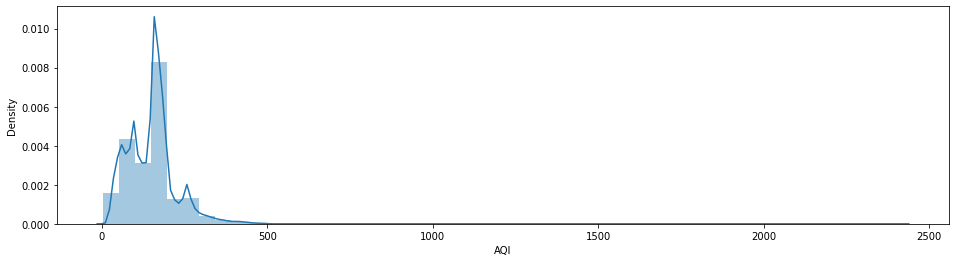

In [46]:
plt.figure(figsize=(16,4)) 
sns.distplot(df['AQI'])

<AxesSubplot:xlabel='RAIN', ylabel='AQI'>

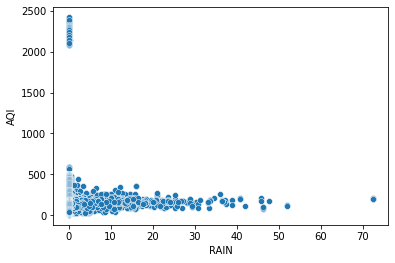

In [47]:
sns.scatterplot(data = df, x = 'RAIN', y = "AQI")

We see from the previous two image that there are some AQI values over 2000. We should check that out.

In [48]:
df[df["AQI"] > 2000]

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,...,NO2_avg,CO_max,O3_max,PM10_AQI,PM2.5_AQI,SO2_AQI,NO2_AQI,CO_AQI,O3_AQI,AQI
24130,552.0,552.0,11.448416,150.724758,8.525348,0.005603,0.4,1016.0,-0.2,0.0,...,156.631539,8.729025,0.005603,423.419375,2093.055556,13.617709,111.524886,57.709747,5.188079,2093.055556
24131,473.0,473.0,14.119713,150.724758,8.641735,0.005094,0.4,1015.3,0.1,0.0,...,157.480215,8.729025,0.005094,442.806875,2174.652778,14.072011,111.685446,57.709747,4.716435,2174.652778
24132,498.0,498.0,12.593257,152.354215,8.423509,0.005094,0.3,1014.6,0.2,0.0,...,157.853632,8.729025,0.005094,445.323125,2218.142361,14.458168,111.756093,57.709747,4.716435,2218.142361
24133,529.0,529.0,12.593257,147.465845,8.205284,0.005094,0.2,1013.5,0.1,0.0,...,157.649950,8.729025,0.005094,445.034375,2224.565972,14.867040,111.717558,57.709747,4.716435,2224.565972
24134,550.0,550.0,11.066802,150.724758,8.139816,0.005603,0.3,1013.4,0.2,0.0,...,157.106798,8.641735,0.005603,441.734375,2218.663194,15.185052,111.614800,58.582649,5.188079,2218.663194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24719,392.0,494.0,3.052911,89.620127,6.110318,0.005603,-3.5,1012.8,-3.5,0.0,...,100.720801,6.110318,0.005603,456.976250,2235.937500,9.983291,100.947179,83.896823,5.188079,2235.937500
24720,385.0,490.0,3.052911,87.175941,6.546769,0.005603,-3.6,1012.8,-3.6,0.0,...,99.261080,6.546769,0.005603,453.181250,2205.381944,9.528989,51.787111,79.532310,5.188079,2205.381944
24721,402.0,494.0,3.052911,84.731756,7.070511,0.005603,-3.5,1013.0,-3.5,0.0,...,97.495835,7.070511,0.005603,449.015000,2174.479167,9.074687,53.667480,74.294895,5.188079,2174.479167
24722,404.0,512.0,3.052911,87.175941,6.983220,0.005603,-3.5,1013.1,-3.5,0.0,...,95.357173,7.070511,0.005603,443.693750,2138.368056,8.506809,55.945620,74.294895,5.188079,2138.368056


<AxesSubplot:xlabel='AQI', ylabel='date'>

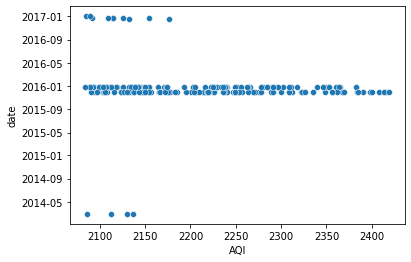

In [49]:
sns.scatterplot(x = df[df["AQI"] > 2000]['AQI'], y = df[df["AQI"] > 2000]['date'])

The air quality with over 2000 values only happen a few times. It might be because of unexpected incident (such as fire) or some sensor errors. We should just ignore it.

<AxesSubplot:xlabel='TEMP', ylabel='AQI'>

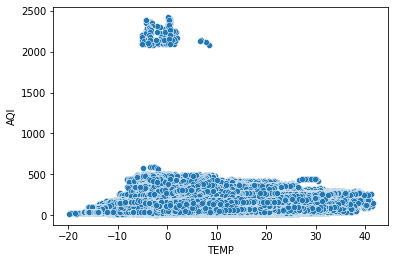

In [50]:
sns.scatterplot(data = df, x = 'TEMP', y = "AQI")

<AxesSubplot:xlabel='PRES', ylabel='AQI'>

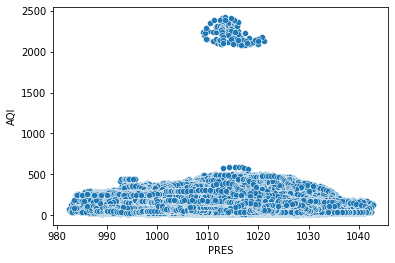

In [51]:
sns.scatterplot(data = df, x = 'PRES', y = "AQI")

<AxesSubplot:xlabel='DEWP', ylabel='AQI'>

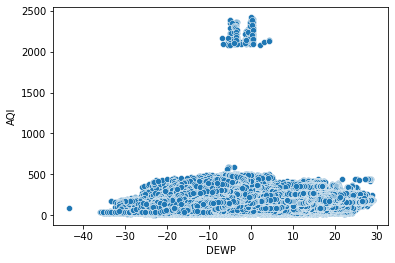

In [52]:
sns.scatterplot(data = df, x = 'DEWP', y = "AQI")

In [53]:
df.corr()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,...,NO2_avg,CO_max,O3_max,PM10_AQI,PM2.5_AQI,SO2_AQI,NO2_AQI,CO_AQI,O3_AQI,AQI
PM2.5,1.000000,0.878874,0.478223,0.664317,0.780165,-0.149508,-0.131607,0.019862,0.113045,-0.014452,...,0.606613,0.664484,-0.149508,0.602187,0.669889,0.411394,0.477621,0.610151,-0.060975,0.648447
PM10,0.878874,1.000000,0.460572,0.645598,0.691887,-0.110443,-0.096078,-0.018375,0.067674,-0.026505,...,0.571575,0.582096,-0.110443,0.611366,0.578738,0.385499,0.463860,0.535112,-0.033699,0.570445
SO2,0.478223,0.460572,1.000000,0.495827,0.522678,-0.165311,-0.320237,0.221235,-0.266121,-0.040028,...,0.454685,0.490241,-0.165311,0.276914,0.292232,0.750102,0.394473,0.488351,-0.105294,0.275032
NO2,0.664317,0.645598,0.495827,1.000000,0.694030,-0.465913,-0.277231,0.176605,-0.032512,-0.043661,...,0.726289,0.582091,-0.465913,0.409329,0.412162,0.404005,0.615211,0.543599,-0.343301,0.367777
CO,0.780165,0.691887,0.522678,0.694030,1.000000,-0.306979,-0.324057,0.188045,-0.060315,-0.013281,...,0.612442,0.854320,-0.306979,0.500767,0.545377,0.446993,0.483289,0.789587,-0.199126,0.517470
O3,-0.149508,-0.110443,-0.165311,-0.465913,-0.306979,1.000000,0.592248,-0.446725,0.312980,0.023361,...,-0.275297,-0.282975,1.000000,-0.073763,-0.074233,-0.182132,-0.251747,-0.268371,0.940666,0.074209
TEMP,-0.131607,-0.096078,-0.320237,-0.277231,-0.324057,0.592248,1.000000,-0.813312,0.820247,0.037647,...,-0.249718,-0.346288,0.592248,-0.073515,-0.072156,-0.359422,-0.219937,-0.335866,0.539312,0.002975
PRES,0.019862,-0.018375,0.221235,0.176605,0.188045,-0.446725,-0.813312,1.000000,-0.750271,-0.060952,...,0.205470,0.224669,-0.446725,-0.003052,0.000063,0.242861,0.189335,0.221076,-0.408688,-0.056551
DEWP,0.113045,0.067674,-0.266121,-0.032512,-0.060315,0.312980,0.820247,-0.750271,1.000000,0.086259,...,-0.097263,-0.136029,0.312980,0.036436,0.096690,-0.301965,-0.093941,-0.145976,0.323550,0.136966
RAIN,-0.014452,-0.026505,-0.040028,-0.043661,-0.013281,0.023361,0.037647,-0.060952,0.086259,1.000000,...,-0.031784,-0.011216,0.023361,-0.003299,0.008142,-0.032749,-0.030628,-0.012558,0.015448,0.005224


We cannot se much effect from the change of temperature, dewpoint, rain, or pressure to the change of air quality.

In [54]:
monthly_AQI = df[['date', 'AQI', 'station']]
monthly_AQI['month'] = df.date.dt.month
monthly_AQI['year'] = df.date.dt.year
monthly_AQI = monthly_AQI.groupby(['year', 'month']).mean().reset_index()

C:\Users\User\AppData\Local\Temp/ipykernel_21324/1766554006.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_AQI['month'] = df.date.dt.month
C:\Users\User\AppData\Local\Temp/ipykernel_21324/1766554006.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_AQI['year'] = df.date.dt.year


In [55]:
monthly_AQI

,year,month,AQI
0,2013,3,165.902439
1,2013,4,135.172823
2,2013,5,162.304972
3,2013,6,174.646309
4,2013,7,148.934915
5,2013,8,143.185183
6,2013,9,146.538085
7,2013,10,157.305657
8,2013,11,136.904806
9,2013,12,143.495621


In [56]:
monthly_AQI.to_csv('monthly_AQI.csv')

In [57]:
monthly_AQI.groupby("month")["AQI"].mean().sort_values()

month
9     129.097398
8     134.935336
5     146.011897
4     147.737972
2     148.951460
6     150.628954
7     153.902386
10    154.672855
11    156.465925
1     157.411930
3     158.401477
12    174.140950
Name: AQI, dtype: float64

The month with the highest average AQI is december followed by march and january.

In [58]:
monthly_AQI.groupby("year")["AQI"].mean().sort_values()

year
2016    141.412416
2013    151.439081
2015    152.554908
2017    154.098438
2014    158.269882
Name: AQI, dtype: float64

In [59]:
station_AQI = df[['date', 'AQI', 'station']]
station_AQI = station_AQI.groupby(['station'])['station', 'AQI'].mean().reset_index()

C:\Users\User\AppData\Local\Temp/ipykernel_21324/3445604384.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  station_AQI = station_AQI.groupby(['station'])['station', 'AQI'].mean().reset_index()


In [60]:
station_AQI.to_csv('station_AQI.csv')

In [61]:
station_AQI.sort_values(by = 'AQI', ascending = False)

,station,AQI
3,Dongsi,157.885749
5,Gucheng,157.497612
11,Wanshouxigong,157.463147
7,Nongzhanguan,157.005882
4,Guanyuan,155.453885
0,Aotizhongxin,154.748374
9,Tiantan,154.624178
10,Wanliu,153.834812
8,Shunyi,149.264727
1,Changping,140.964197


Station with the worst air quality is Dongsi, followed by Gucheng and Wanshouxigong, while the least polluted station is Dingling

In [62]:
wind = df.groupby('wd').mean().reset_index()
wind

,wd,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,...,NO2_avg,CO_max,O3_max,PM10_AQI,PM2.5_AQI,SO2_AQI,NO2_AQI,CO_AQI,O3_AQI,AQI
0,E,101.670672,124.173662,7.029913,48.592004,1.380898,0.024379,13.962534,1010.194323,5.668780,...,44.546579,1.726257,0.024379,84.226720,162.139605,9.583399,45.937260,20.476076,29.625688,165.874354
1,ENE,97.723176,119.320582,7.117142,52.100657,1.407537,0.018308,11.820403,1012.146206,3.626373,...,48.468368,1.805276,0.018308,83.778292,160.389039,10.303348,50.120678,22.053444,20.065024,162.187297
2,ESE,101.977483,125.529935,7.060791,44.956843,1.288891,0.031174,15.422364,1009.206413,6.325019,...,42.212094,1.642681,0.031174,84.237434,161.972709,9.193199,43.766240,19.360510,40.680439,167.456406
3,N,67.364098,89.784431,4.708886,38.503869,0.967583,0.021968,11.457970,1011.703786,0.486812,...,40.048776,1.354410,0.021968,73.752703,138.677465,8.601424,42.117584,16.112623,22.566618,140.489461
4,NE,86.190504,106.822057,6.631252,48.717544,1.240332,0.017657,10.780187,1013.009711,1.985040,...,46.227539,1.619004,0.017657,79.286255,150.161482,10.231209,48.466425,19.719281,18.556400,151.758726
5,NNE,71.207380,91.018489,5.353365,41.167770,1.051982,0.020478,11.953565,1011.980625,1.951029,...,41.658189,1.446081,0.020478,75.026037,141.892049,8.948284,43.757256,17.353190,21.535600,143.606173
6,NNW,53.836815,77.325783,4.106755,30.010876,0.814914,0.025191,10.511613,1012.193006,-2.806868,...,35.094948,1.204769,0.025191,71.125865,131.051262,8.161940,36.656118,14.262792,25.650933,133.306567
7,NW,51.843491,79.071368,3.875975,29.095951,0.777178,0.025965,9.806517,1012.851999,-4.138129,...,34.515985,1.195599,0.025965,70.765615,128.446402,7.698441,36.026761,14.261311,26.338232,130.985731
8,S,89.311828,116.512736,7.033630,39.124657,1.057873,0.047152,18.606354,1007.992673,6.277026,...,39.914728,1.383260,0.047152,79.075795,150.524645,8.430750,41.934056,16.176077,71.709247,165.443195
9,SE,96.674710,123.589131,7.151478,42.708444,1.179405,0.036701,16.042031,1009.499715,5.608884,...,40.761023,1.507522,0.036701,81.214803,157.668293,8.833102,42.939038,17.649637,51.688096,166.063726


In [63]:
wind.to_csv('wind.csv')

In [70]:
df[['date', 'station', 'AQI', 'wd']].to_csv("viz.csv")
df[['date', 'wd', 'PM10_AQI']].to_csv("PM10_AQI.csv")
df[['date', 'wd', 'PM2.5_AQI']].to_csv("PM2.5_AQI.csv")
df[['date', 'wd', 'SO2_AQI']].to_csv("SO2_AQI.csv")
df[['date', 'wd', 'NO2_AQI']].to_csv("NO2_AQI.csv")
df[['date', 'wd', 'CO_AQI']].to_csv("CO_AQI.csv")
df[['date', 'wd', 'O3_AQI']].to_csv("O3_AQI.csv")

In [ ]:
wind.groupby("wd")["AQI"].mean().sort_values()

The Air quality is worse, when the wind is coming from between south and east direction.

## Data Visualization

In [ ]:
# visualizing monthly AQI for each year.
plt.figure(figsize=(16,4)) 
sns.lineplot(data = monthly_AQI, x = 'month', y = 'AQI', hue = 'year', palette = 'bright')
plt.ylim(0, 250)

In [ ]:
# visualizing worst polluted station
plt.figure(figsize=(16,4)) 
sns.barplot(y = station_AQI.sort_values(by = 'AQI', ascending = True)['AQI'],
            x = station_AQI.sort_values(by = 'AQI', ascending = True)['station'],
            palette = 'flare')
plt.xticks(rotation= 90)

In [ ]:
def compass_to_degrees(direction):
    compass_directions = ['E', 'ENE', 'NE', 'NNE',
                          'N', 'NNW', 'NW', 'WNW',
                          'W', 'WSW', 'SW', 'SSW',
                          'S', 'SSE', 'SE', 'ESE'
                         ]
    degrees_per_direction = 360 / len(compass_directions)
    
    return compass_directions.index(direction)*degrees_per_direction

In [ ]:
wind["wd_degrees"] = wind["wd"].apply(lambda x: compass_to_degrees(x))
wind

In [ ]:
def plot_radar_chart(ax, categories, values, title="Radar Chart"):
    num_vars = len(categories)

    values += values[:1]
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    ax.fill(angles, values, alpha=0.25, label=title)

    ax.set_thetagrids(np.degrees(angles[:-1]), categories)

wind_directions = ['E', 'ENE', 'NE', 'NNE',
                   'N', 'NNW', 'NW', 'WNW',
                   'W', 'WSW', 'SW', 'SSW',
                   'S', 'SSE', 'SE', 'ESE'
                  ]
air_quality = {
    'PM10': [wind[wind['wd'] == i]['PM10_AQI'].values[0] for i in wind_directions],
    'PM2.5':[wind[wind['wd'] == i]['PM2.5_AQI'].values[0] for i in wind_directions],
    'SO2':[wind[wind['wd'] == i]['SO2_AQI'].values[0] for i in wind_directions],
    'NO2':[wind[wind['wd'] == i]['NO2_AQI'].values[0] for i in wind_directions],
    'CO':[wind[wind['wd'] == i]['CO_AQI'].values[0] for i in wind_directions],
    'O3':[wind[wind['wd'] == i]['O3_AQI'].values[0] for i in wind_directions]
}

In [ ]:
# visualizing pollution source based on the wind direction
fig, ax = plt.subplots(subplot_kw=dict(polar=True), figsize=(8, 8))

# Plot radar charts for each pollutants
for title, values in air_quality.items():
    plot_radar_chart(ax, wind_directions, values, title=title)

plt.title('Pollution Source')
ax.legend(loc='upper left')

plt.show()

## Conclusion
1. The average AQI is 151 and there is no significant difference between each year air quality. The worst air quality is in December followed by March and January, while the best is in September.
2. Dongsi Station has the worst air quality with AQI number 157. Station with the lowest AQI number is Dingling
3. The AQI number is the highest when the wind direction comes from between East and South Direction.